### <b> Goal - <b>

Build a predictive model that predicts the electricity consumption for North American Residents

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

from sklearn.decomposition import 
PCA
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import shap

import seaborn as sns
import matplotlib.pyplot as plt


/Users/dishamendiratta/opt/anaconda3/envs/modeling/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/dishamendiratta/opt/anaconda3/envs/modeling/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Reading Data

In [46]:
df = pd.read_csv("data.csv")

Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.


In [47]:
df.sample(5)

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HE

#### Feature Categorisation (some of the features mentioned)

- Identifer - 'DOEID'

- Categorical Variables - 
    - Location - 'REGIONC', 'DIVISION', 'REPORTABLE_DOMAIN'
    - House Feature - 'TYPEHUQ', 
    - Heating/Cooling - 'HDD65', 'CDD65', 'HDD30YR', 'CDD30YR', 'Climate_Region_Pub', 'AIA_Zone'

- Continuous Variables - 

- Inputation Flags - 
    - Col names Starting with Z


- Could not interpret - 'NWEIGHT'

- Response Variables - 'KWH'

### Exploratory Descriptive Analysis (EDA)

In [48]:
df.shape

(12083, 940)

In [49]:
# Unique Respondents
df['DOEID'].nunique()

12083

In [50]:
df.dtypes

DOEID                   int64
REGIONC                 int64
DIVISION                int64
REPORTABLE_DOMAIN       int64
TYPEHUQ                 int64
NWEIGHT               float64
HDD65                   int64
CDD65                   int64
HDD30YR                 int64
CDD30YR                 int64
Climate_Region_Pub      int64
AIA_Zone                int64
METROMICRO             object
UR                     object
KOWNRENT                int64
CONDCOOP                int64
YEARMADE                int64
YEARMADERANGE           int64
OCCUPYYRANGE            int64
CONVERSION              int64
ORIG1FAM                int64
LOOKLIKE                int64
NUMFLRS                 int64
NUMAPTS                 int64
WALLTYPE                int64
ROOFTYPE                int64
STUDIO                  int64
NAPTFLRS                int64
STORIES                 int64
TYPEHUQ4                int64
BEDROOMS                int64
NCOMBATH                int64
NHAFBATH                int64
OTHROOMS  

In [51]:
# creating a list of variables to be dropped

drop_cols = []

In [52]:
drop_cols.extend(['DOEID'])

In [53]:
# Finding missing Values
df_missing = pd.DataFrame(df.isnull().sum())
df_missing[df_missing[0]!=0]

,0


There is no missing value, but in the recs2009_public_codebook it is mentioned that for some columns -2 represents 'not applicable'. Thus it is necessary to check features which majorly have -2 value. We can further see how these are correlated with the electricity consumption, and then decide if we need to remove some columns.

In [54]:
na_90_perc = []
for i in df.columns:
    na_perc = df[df[i] == -2].shape[0]/len(df)
    if na_perc > 0.90:
        na_90_perc.append(i)

In [55]:
print(len(na_90_perc))

94


In [56]:
drop_cols.extend(na_90_perc)

94 columns have more than 90% values as 'Not Applicable'

In [57]:
df.describe()

DOEID       REGIONC      DIVISION  REPORTABLE_DOMAIN  \
count  12083.000000  12083.000000  12083.000000       12083.000000   
mean    6042.000000      2.628321      5.373086          14.783663   
std     3488.205986      1.042142      2.859366           8.195824   
min        1.000000      1.000000      1.000000           1.000000   
25%     3021.500000      2.000000      3.000000           8.000000   
50%     6042.000000      3.000000      5.000000          15.000000   
75%     9062.500000      3.000000      7.000000          21.000000   
max    12083.000000      4.000000     10.000000          27.000000   

            TYPEHUQ       NWEIGHT         HDD65         CDD65       HDD30YR  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       2.659604   9402.981870   4141.375238   1415.406108   4135.146983   
std        1.192627   5192.101419   2317.759375   1134.659475   2260.543686   
min        1.000000    476.100000      0.000000      0.000000      0.000000   
25%        2.000000   6297.040000   2197.500000    561.000000   2224.000000   
50%        2.000000   7970.630000   4483.000000   1045.000000   4502.000000   
75%        3.000000  11330.030000   5913.000000   1897.000000   5854.000000   
max        5.000000  95779.140000  12525.000000   5480.000000  13346.000000   

            CDD30YR  Climate_Region_Pub      AIA_Zone      KOWNRENT  \
count  12083.000000        12083.000000  12083.000000  12083.000000   
mean    1443.503104            2.601010      3.265000      1.338078   
std     1021.748722            1.349571      1.278652      0.497299   
min        0.000000            1.000000      1.000000      1.000000   
25%      712.000000            1.000000      2.000000      1.000000   
50%     1179.000000            3.000000      3.000000      1.000000   
75%     1842.500000            4.000000      4.000000      2.000000   
max     5357.000000            5.000000      5.000000      3.000000   

           CONDCOOP      YEARMADE  YEARMADERANGE  OCCUPYYRANGE    CONVERSION  \
count  12083.000000  12083.000000   12083.000000  12083.000000  12083.000000   
mean      -1.801457   1971.062402       4.027725      6.691964     -1.752793   
std        0.784550     24.817912       2.119578      1.535312      0.865886   
min       -2.000000   1920.000000       1.000000      1.000000     -2.000000   
25%       -2.000000   1955.000000       2.000000      6.000000     -2.000000   
50%       -2.000000   1975.000000       4.000000      7.000000     -2.000000   
75%       -2.000000   1991.000000       6.000000      8.000000     -2.000000   
max        2.000000   2009.000000       8.000000      8.000000      2.000000   

           ORIG1FAM      LOOKLIKE       NUMFLRS       NUMAPTS      WALLTYPE  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean      -1.952164     -1.955640     -1.066705      4.486717      2.738889   
std        0.364856      0.386862      2.766326     29.662574      1.512821   
min       -2.000000     -2.000000     -2.000000     -2.000000      1.000000   
25%       -2.000000     -2.000000     -2.000000     -2.000000      2.000000   
50%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
75%       -2.000000     -2.000000     -2.000000     -2.000000      3.000000   
max        1.000000      2.000000     35.000000    365.000000      9.000000   

           ROOFTYPE        STUDIO      NAPTFLRS       STORIES      TYPEHUQ4  \
count  12083.000000  12083.000000  12083.000000  12083.000000  12083.000000   
mean       3.676157     -1.510635     -1.269635     10.507738     -1.899694   
std        2.772088      0.890336      1.323690      8.779010      0.472066   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%        2.000000     -2.000000     -2.000000     10.000000     -2.000000   
50%        5.000000     -2.000000     -2.000000     10.000000     -2.000000   
75%        5.000000     -2.000000     -2.0000

In [58]:
df['KWH'].describe()

count     12083.000000
mean      11288.159398
std        7641.190845
min          17.000000
25%        5837.000000
50%        9623.000000
75%       14765.000000
max      150254.000000
Name: KWH, dtype: float64

The mean value of target variable is ~ 11288 KWH and standard deviation of arounf 7641 KWH which means the distance between observations and the mean value of KWH is considerably higher

The min and max value for target variable are 17 and 150254 KWH, the range of values is quite large

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='KWH', ylabel='Density'>

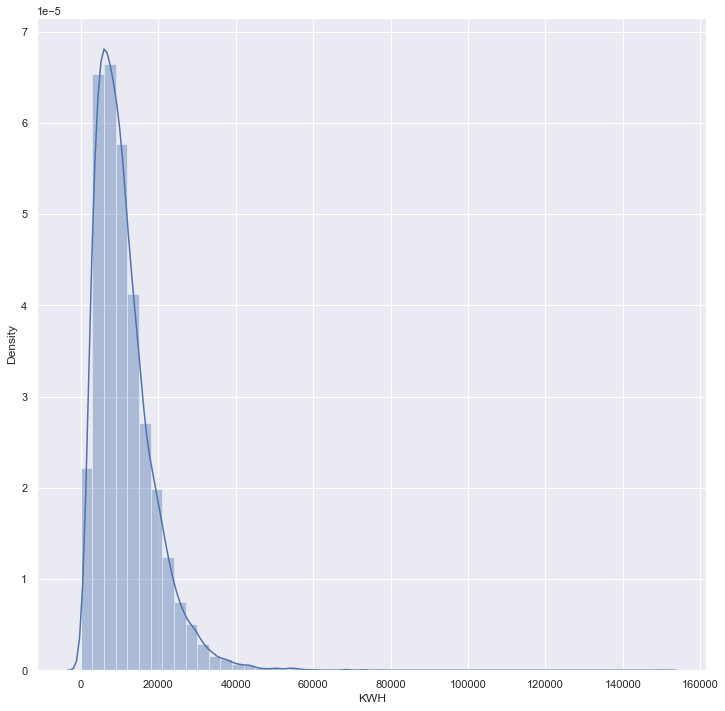

In [59]:
# Target (KWH) Distribution

sns.distplot(df['KWH'])

The graph is right skewed (tail on right side)

In [60]:
print("Skewness: %f" % df['KWH'].skew())

Skewness: 2.114188


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0.5, 1.0, 'KWH Boxplot')]

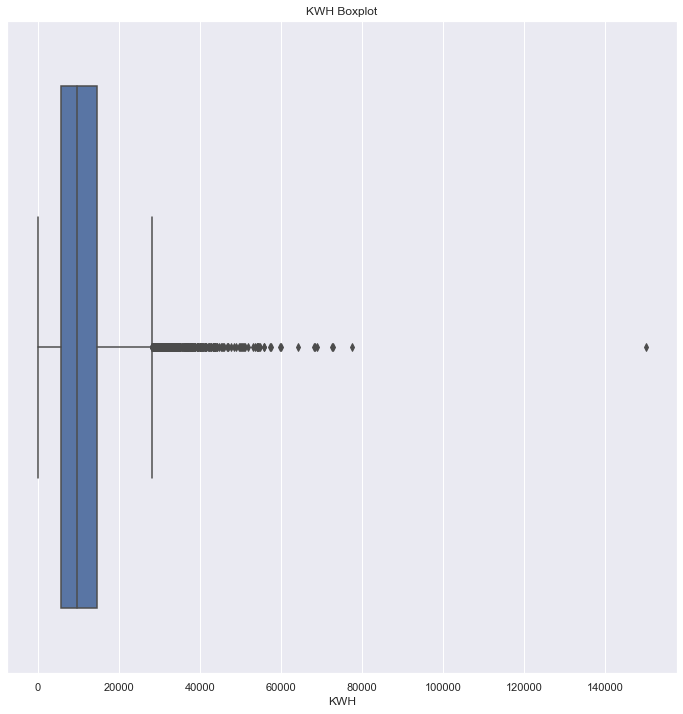

In [61]:
sns.boxplot(df['KWH']).set(title = 'KWH Boxplot')

In [76]:
df[df['KWH'] > 30000]['DOEID'].count()

297

In [78]:
df = df[~(df['KWH'] > 30000)]

In [79]:
df.shape

(11786, 940)

<AxesSubplot:xlabel='TYPEHUQ'>

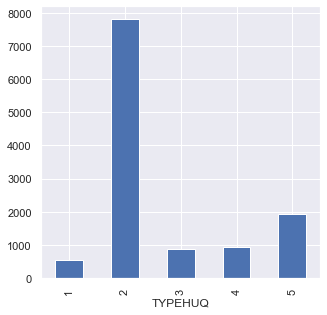

In [67]:
# Type of Houding Unit
df.groupby('TYPEHUQ').size().plot(kind='bar', figsize=(5,5))

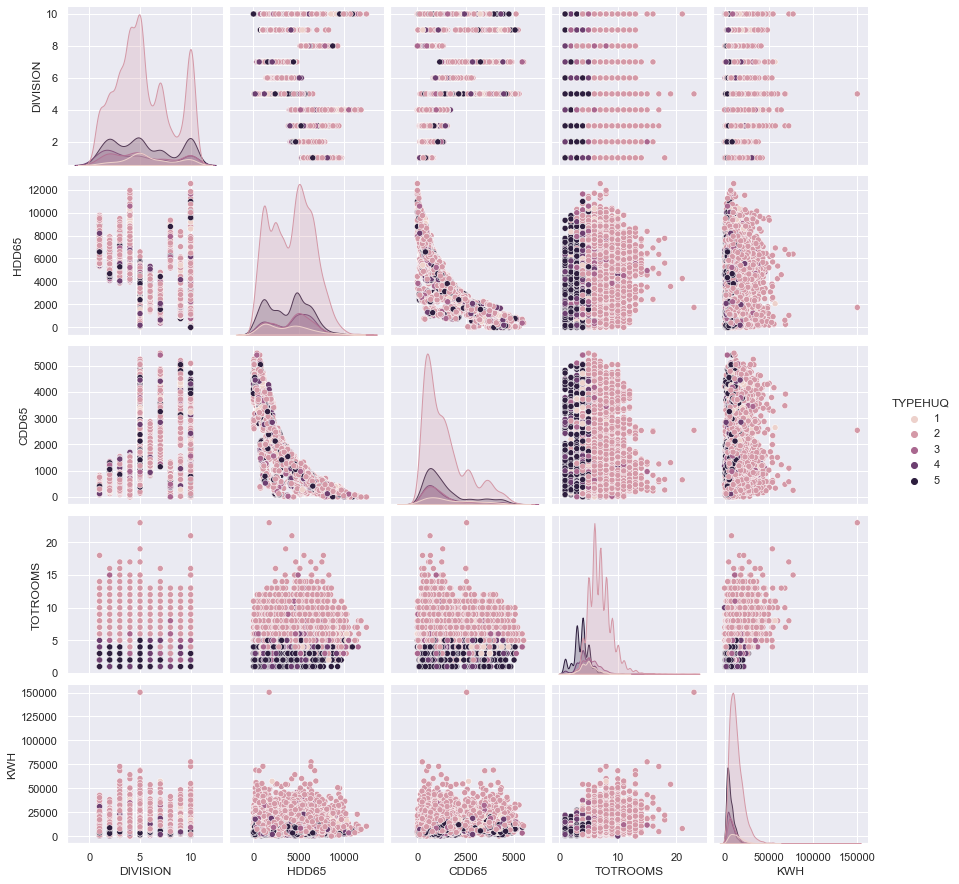

In [72]:
sns.pairplot(df[['TYPEHUQ', 'DIVISION','HDD65',
'CDD65','UR', 'TOTROOMS','KWH']], hue = 'TYPEHUQ')

    1 - New England Census Division (CT, MA, ME, NH, RI, VT) 
    2 - Middle Atlantic Census Division (NJ, NY, PA)
    3 - East North Central Census Division (IL, IN, MI, OH, WI)
    4 - West North Central Census Division (IA, KS, MN, MO, ND, NE, SD)
    5 - South Atlantic  Census Division (DC, DE, FL, GA, MD, NC, SC, VA, WV)
    6 - East South Central Census Division (AL, KY, MS, TN)
    7 - West South Central Census Division (AR, LA, OK, TX)
    8 - Mountain North Sub-Division (CO, ID, MT, UT, WY)
    9 - Mountain South Sub-Division (AZ, NM, NV)
    10  - Pacific Census Division (AK, CA, HI, OR, WA)

In [21]:
# Bivariate Analysis

In [22]:
correlation = df.corr()

Total Electricity Consumption (KWH) = KWHSPH + KWHCOL + KWHWTH + KWHRFG + KWHOTH

Since KWH is directly linked with these features, it's better to remove these. 

Apart from this, there are several other columns which are derived features

1. BTUEL = BTUELSPH + BTUELCOL + BTUELWTH + BTUELRFG + BTUELOTH
2. DOLLAREL = DOLELSPH + DOLELCOL + DOLELWTH + DOLELRFG + DOLELOTH
3. CUFEETNG = CUFEETNGSPH + CUFEETNGWTH + CUFEETNGOTH
4. BTUNG = BTUNGSPH + BTUNGWTH + BTUNGOTH
5. DOLLARNG = DOLNGSPH + DOLNGWTH + DOLNGOTH
6. GALLONLP = GALLONLPSPH + GALLONLPWTH + GALLONLPOTH
7. BTULP = BTULPSPH + BTULPWTH + BTULPOTH
8. DOLLARLP = DOLLPSPH + DOLLPWTH + DOLLPOTH
9. GALLONFO = GALLONFOSPH + GALLONFOWTH + GALLONFOOTH
10. BTUFO = BTUFOSPH + BTUFOWTH + BTUFOOTH
11. DOLLARFO = DOLFOSPH + DOLFOWTH +DOLFOOTH 
12. GALLONKER = GALLONKERSPH + GALLONKERWTH + GALLONKEROTH
13. BTUKER = BTUKERSPH + BTUKERWTH + BTUKEROTH
14. DOLLARKER = DOLKERSPH + DOLKERWTH + DOLKEROTH
15. TOTALBTU = TOTALBTUSPH + TOTALBTUCOL + TOTALBTUWTH + TOTALBTURFG + TOTALBTUOTH
16. TOTALDOL = TOTALDOLSPH + TOTALDOLCOL + TOTALDOLWTH + TOTALDOLRFG + TOTALDOLOTH
17. TOTROOMS = BEDROOMS + NCOMBATH + NHAFBATH

"SPH" refers to space heating, "WTH" refers to water heating, "COL" refers to air conditioning, "RFG" refers to refrigerators, and "OTH" refers to all other purposes.

We can either remove the calculated column or the columns from which the feature is calculated to avoid redundancy. 


In [23]:
kwh_cols = [col for col in df.columns if 'KWH' in col]

In [25]:
# to prevent data leakage
drop_cols.extend(['KWHSPH', 'KWHCOL', 'KWHWTH', 'KWHRFG', 'KWHOTH'])

In [26]:
BTUEL_cols = [col for col in df.columns if 'BTUEL' in col]
df[['KWH'] + BTUEL_cols].corr()

,KWH,BTUEL,BTUELSPH,BTUELCOL,BTUELWTH,BTUELRFG,BTUELOTH
KWH,1.000000,1.000000,0.497684,0.655104,0.585656,0.638621,0.880403
BTUEL,1.000000,1.000000,0.497684,0.655103,0.585657,0.638621,0.880403
BTUELSPH,0.497684,0.497684,1.000000,0.085220,0.566869,0.169007,0.225406
BTUELCOL,0.655104,0.655103,0.085220,1.000000,0.186502,0.330334,0.425913
BTUELWTH,0.585656,0.585657,0.566869,0.186502,1.000000,0.177887,0.319243
BTUELRFG,0.638621,0.638621,0.169007,0.330334,0.177887,1.000000,0.633380
BTUELOTH,0.880403,0.880403,0.225406,0.425913,0.319243,0.633380,1.000000


BTU (British Thermal Unit) is defined as the amount of heat required to raise the temperature of one pound of water by one degree Fahrenheit.

1 KWH = 3412.14 BTU

BTU is directly related to KWH, thus we can remove this

In [27]:
drop_cols.extend(BTUEL_cols)

In [28]:
DOLLAREL_cols = [col for col in df.columns if 'DOLEL' in col]
df[['KWH'] + DOLLAREL_cols].corr()

,KWH,DOLELSPH,DOLELCOL,DOLELWTH,DOLELRFG,DOLELOTH
KWH,1.000000,0.452504,0.601626,0.514613,0.433472,0.702251
DOLELSPH,0.452504,1.000000,0.073170,0.488109,0.025660,0.083229
DOLELCOL,0.601626,0.073170,1.000000,0.172508,0.303009,0.412654
DOLELWTH,0.514613,0.488109,0.172508,1.000000,0.061744,0.192928
DOLELRFG,0.433472,0.025660,0.303009,0.061744,1.000000,0.644175
DOLELOTH,0.702251,0.083229,0.412654,0.192928,0.644175,1.000000


DOLLAREL - This col relates to electricity cost, i.e. high usage, high cost or low usage, low cost

This col may lead to data leakage. Thus will be removing this

In [29]:
drop_cols.extend(['DOLLAREL'])
drop_cols.extend(DOLLAREL_cols)

In [30]:
KWH_corr = df.drop(drop_cols,axis=1).corr()['KWH']
KWH_corr[KWH_corr > 0.6]

KWH            1.000000
TOTALBTUCOL    0.655103
TOTALBTURFG    0.638621
TOTALBTUOTH    0.676108
TOTALDOL       0.627922
TOTALDOLCOL    0.601628
TOTALDOLOTH    0.655742
Name: KWH, dtype: float64

[Text(0.5, 1.0, 'Correlation Plot'),
 Text(0.5, 84.5, 'its x_label'),
 Text(84.5, 0.5, 'its y_label')]

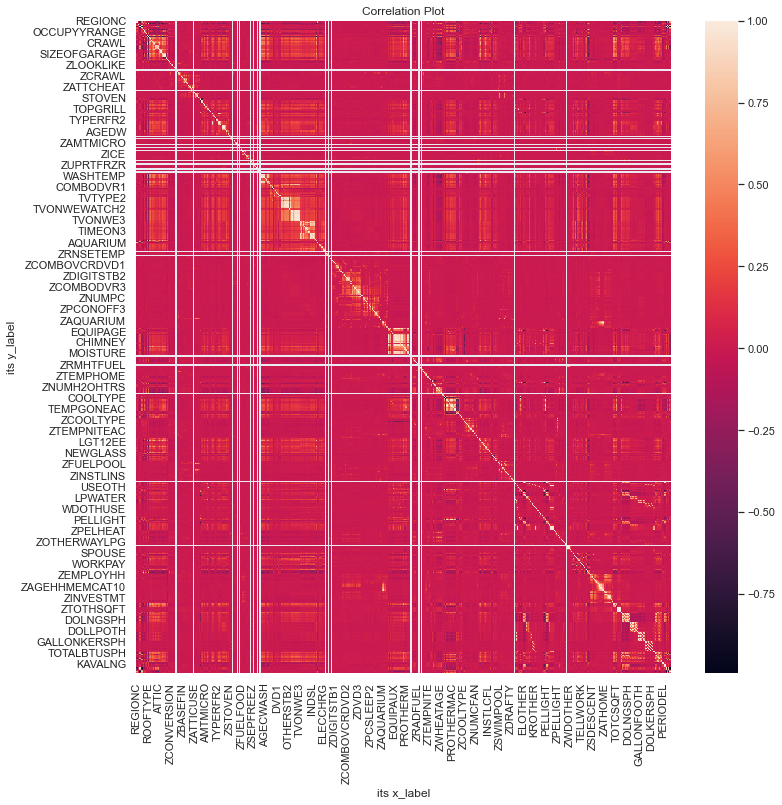

In [31]:
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(df.drop(drop_cols,axis=1).corr()).set(title='Correlation Plot', xlabel='its x_label', ylabel='its y_label')



In [32]:
# Checking % of Data imputed based on Imputation Flag(columns starting with 'Z')
imputation_col = [col for col in df if col.startswith('Z')]

for i in imputation_col:
    no_imputation = df[[i]].value_counts()[0]/len(df)
    if no_imputation < 0.95:
        print(i, no_imputation)


ZYEARMADE 0.8508648514441778
ZEQUIPAGE 0.9280807746420591
ZFUELH2O 0.9324671025407597
ZWHEATSIZ 0.9265910783745759
ZWHEATAGE 0.8759414052801456
ZWHEATBKT 0.8852106265000413
ZHouseholder_Race 0.925597947529587
ZMONEYPY 0.8750310353389059
ZTOTSQFT 0.9025076553835968
ZTOTSQFT_EN 0.9025076553835968
ZTOTHSQFT 0.9025076553835968
ZTOTUSQFT 0.9025076553835968
ZTOTCSQFT 0.9025076553835968
ZTOTUCSQFT 0.9025076553835968


Seems most of the data points are not imputed. We can remove imputation flags in the preprocessing step

In [33]:
drop_cols.extend(imputation_col)

### Pre-processing
- Label, 
- Data Cleaning - Handle Missing Values (imputation or deletion), Handle Outliers (removal / clipping), Handle Multicollinearity


In [34]:
numerical_features = list(df._get_numeric_data().columns)
categorical_features = list(set(df.columns) - set(numerical_features))

print(len(numerical_features))
print(len(categorical_features))

935
5


In [35]:
categorical_features

['UR', 'NOCRCASH', 'METROMICRO', 'NKRGALNC', 'IECC_Climate_Pub']

In [36]:
for i in categorical_features:
    print(df[i].value_counts()/len(df)*100)

U    79.913929
R    20.086071
Name: UR, dtype: float64
-2    82.413308
-2    16.783911
1      0.148970
3      0.082761
4      0.082761
5      0.074485
2      0.057933
1      0.049657
16     0.033104
12     0.024828
8      0.024828
6      0.024828
4      0.016552
.      0.016552
3      0.016552
24     0.016552
12     0.016552
15     0.016552
55     0.016552
10     0.008276
20     0.008276
40     0.008276
55     0.008276
28     0.008276
6      0.008276
24     0.008276
10     0.008276
20     0.008276
25     0.008276
Name: NOCRCASH, dtype: float64
METRO    85.260283
MICRO     9.178184
NONE      5.561533
Name: METROMICRO, dtype: float64
-2    82.413308
-2    16.783911
5      0.347596
3      0.091037
1      0.082761
10     0.066209
5      0.041380
10     0.041380
1      0.016552
.      0.016552
15     0.016552
8      0.008276
3      0.008276
2      0.008276
77     0.008276
30     0.008276
15     0.008276
8      0.008276
55     0.008276
2      0.008276
20     0.008276
Name: NKRGALNC, dtype: f

85% of the responses (n = 10302) were recorded from housing units in census metropolitan area where as 9% of the responses (n = 1109) were recorded from housing units in census micropolitan area. 

If we look into UR Category, we get to know that 80% of the surveyed housing units (n = 9656) were from urban area whereas rest 20% (n = 2427) were from rural area

Cols - NKRGALNC, NOCRCASH 
seem to have some discrepancy in data type
also, most represent 'not applicable'


can remove these in the next feature engineering phase

rest are nominal data, thus can be one hot encoded

In [37]:
drop_cols.extend(['NKRGALNC', 'NOCRCASH'])


In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
df[['KWH']].quantile(0.25)

KWH    5837.0
Name: 0.25, dtype: float64

In [40]:
Q1 = df[['KWH']].quantile(0.25)
Q3 = df[['KWH']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['KWH']] < (Q1 - 1.5 * IQR)) |(df[['KWH']] > (Q3 + 1.5 * IQR))).any(axis=1)]


### Feature Engineering
- Time Decomposition
- Encoding (Numerical or Categorical)
- Create new features
- 

In [41]:
df['house_age'] =2009 - df['YEARMADE']

YEARMADERANGE provides similar info related to YEARMADE, thus we can drop this

In [42]:
drop_cols.extend(['YEARMADE', 'YEARMADERANGE'])

In [43]:
df = df.drop(drop_cols, axis=1)

In [44]:
# One Hot Encoding of Categorical Variables
df = pd.get_dummies(df)

In [39]:
df.shape

(11677, 479)

In [40]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


In [18]:
# compute the vif for all given features
def compute_vif(df, considered_features=None):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif



In [ ]:
compute_vif(df_pp, list(df_pp.columns))

/Users/dishamendiratta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/dishamendiratta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/dishamendiratta/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [41]:
# Features and Response Variable (Target)
X = df.drop(['KWH'],axis=1)
y = df['KWH']

In [42]:
# Splitting Data into Train and Test (70:30 Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [43]:
# Standardising / Normalising Train Data, and using same scale for Test Data

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)
y_train = np.array(y_train)



### Feature Selection

- PCA
- L1 Regression (identify predictors correlated with target variable, remove multi collinearity (thus prevents overfitting))
- Random Forest Variable Importance

In [83]:
from sklearn.linear_model import Lasso, Ridge


In [86]:
model_lasso = Lasso(tol = 1e-3)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

96.80196482421317
0.9997383991782574
100.56794947107984
0.999718162666232


In [84]:
rr = Ridge()
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

0.08509770514800981
0.9999999997978348
0.09036422770730375
0.9999999997724524


### Modeling
- Train Model
- Hyperparamter Tuning

In [87]:
def train_model(X_train, y_train, model_name):
    
    if model_name == 'LR':
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train,)
        
    if model_name == 'Ridge':
        model = Ridge(fit_intercept=True)
        model.fit(X_train, y_train,)
        
    if model_name == 'Lasso':
        model = Lasso(fit_intercept=True)
        model.fit(X_train, y_train,)
        
    if model_name == 'RF':
        model = RandomForestRegressor()
        model.fit(X_train, y_train,)
        
    if model_name == 'XGB':
        model = XGBRegressor()
        model.fit(X_train, y_train)
        
    if model_name == 'NN':
        model = keras.Sequential([
            layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
            layers.Dense(64, activation='relu'),
            layers.Dense(1)
          ])
        
        optimizer = tf.keras.optimizers.RMSprop(0.001)
        model.compile(loss='mse',
                        optimizer=optimizer,
                        metrics=['mae', 'mse'])
        
        EPOCHS = 100
        
        history = model.fit(X_train, y_train,
                            epochs=EPOCHS, validation_split = 0.2, verbose=0)
        
    return model

In [88]:
nn = train_model(X_train, y_train, 'NN')

2022-07-28 14:56:14.093762: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-28 14:56:14.095734: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [61]:
lr = train_model(X_train_scaled_pca, y_train, 'LR')
rf = train_model(X_train_scaled_pca, y_train, 'RF')
xg = train_model(X_train_scaled_pca, y_train, 'XGB')


In [89]:
metrics_model(X_train, y_train, nn, "Neural Nets")
metrics_model(X_test, y_test, nn, "Neural Nets")




Model - Neural Nets
Here are model metrics - 
Mean Absolute Error 66.79477211464345
Mean Squared Error 9076.548534855132
Root Mean Squared Error 95.27092176973586
R2 Score 0.9997466088203862
Model - Neural Nets
Here are model metrics - 
Mean Absolute Error 69.3914231731467
Mean Squared Error 12743.94015191105
Root Mean Squared Error 112.88906125887951
R2 Score 0.9996448735216932


In [64]:
print("Training Error")
metrics_model(X_train_scaled_pca, y_train, lr, "Logistic Regression")
print("\n")
metrics_model(X_train_scaled_pca, y_train, rf, "Random Forest")
print("\n")
metrics_model(X_train_scaled_pca, y_train, xg, "Boosting")
print("\n")
metrics_model(X_train, y_train, nn, "Neural Nets")
print("\n")
print("Testing Error")
metrics_model(X_test_scaled_pca, y_test, lr, "Logistic Regression")
print("\n")
metrics_model(X_test_scaled_pca, y_test, rf, "Random Forest")
print("\n")
metrics_model(X_test_scaled_pca, y_test, xg, "Boosting")
print("\n")
metrics_model(X_test, y_test, nn, "Neural Nets")
print("\n")

Training Error
Model - Logistic Regression
Here are model metrics - 
Mean Absolute Error 1472.5464323595327
Mean Squared Error 3994657.2437497736
Root Mean Squared Error 1998.663864623007
R2 Score 0.8884806369668644


Model - Random Forest
Here are model metrics - 
Mean Absolute Error 972.4622317386517
Mean Squared Error 1705084.0665833598
Root Mean Squared Error 1305.7886760817617
R2 Score 0.9523989475390305


Model - Boosting
Here are model metrics - 
Mean Absolute Error 294.3199195740463
Mean Squared Error 154686.66335667504
Root Mean Squared Error 393.3022544515541
R2 Score 0.9956815924083978




Testing Error
Model - Logistic Regression
Here are model metrics - 
Mean Absolute Error 1512.587082741349
Mean Squared Error 4171583.843958301
Root Mean Squared Error 2042.4455547108964
R2 Score 0.8837533869582384


Model - Random Forest
Here are model metrics - 
Mean Absolute Error 2617.428587328767
Mean Squared Error 12051385.427593863
Root Mean Squared Error 3471.5105397497878
R2 Score 

In [60]:
rfc = RandomForestRegressor()
rfc.fit(X_train_scaled_pca, y_train)
display(rfc.score(X_train_scaled_pca, y_train))


0.9690378105730384

In [66]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
display(rf.score(X_train_scaled, y_train))



0.9998553348048322

In [69]:
rf1 = RandomForestRegressor()
rf1.fit(X_train, y_train)
display(rf1.score(X_train, y_train))




0.9998613614703364

Predictive Methodology

### Model Evaluation
- K-Fold Cross Validation
- Loss Metrics
- Grid Search, Random Search, HyperOpt 

In [90]:
def metrics_model(X_test, y_test, model, model_name):
    print("Model - {}".format(model_name))
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test,predictions)
    mse = mean_squared_error(y_test,predictions)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_test,predictions)
    
    print("Here are model metrics - ",)
#     print("Mean Absolute Error", mae)
#     print("Mean Squared Error", mse)
    print("Root Mean Squared Error", rmse)
    print("R2 Score", r2score)

In [116]:
from sklearn.model_selection import cross_val_score
def cross_validation(model, X, y, cv=5):
    
    scoring = ['r2', 'neg_root_mean_squared_error']
    # stratified k fold
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)
    
      
    return {"Train R2": scores['train_r2'].mean(),
              "Train RMSE": scores['train_neg_root_mean_squared_error'].mean(),
            "Val R2": scores['test_r2'].mean(),
              "Val RMSE": scores['test_neg_root_mean_squared_error'].mean(),
              }

In [117]:
cross_validation(rr, X_train, y_train, 5)

{'Train R2': 0.9999999998007224,
 'Train RMSE': -0.08448353104692881,
 'Test R2': 0.9999999997690837,
 'Test RMSE': -0.09087320850690433}

In [118]:
cross_validation(model_lasso, X_train, y_train, 5)

{'Train R2': 0.9997746122491312,
 'Train RMSE': -89.70692064813599,
 'Test R2': 0.9997573726813375,
 'Test RMSE': -92.72920829125813}

In [119]:
cross_validation(rf, X_train, y_train, 5)

{'Train R2': 0.9937107504340466,
 'Train RMSE': -474.61865517913685,
 'Test R2': 0.955833631054336,
 'Test RMSE': -1256.5835206387196}

In [121]:
cross_validation(xg, X_train, y_train, 5)

{'Train R2': 0.9986612339587133,
 'Train RMSE': -218.91406463702583,
 'Test R2': 0.9668679119092081,
 'Test RMSE': -1088.5280759909929}

In [124]:
cross_validation(lr, X_train, y_train, 5)

{'Train R2': 0.999999999800972,
 'Train RMSE': -0.08443064616875237,
 'Test R2': 0.9999999997677971,
 'Test RMSE': -0.09112675760166263}

In [73]:
metrics_model(X_train, y_train, rf1, "Random Forest")
print("\n")
metrics_model(X_train_scaled, y_train, rf, "Random Forest")
print("\n")
metrics_model(X_train_scaled_pca, y_train, rfc, "Random Forest")

Model - Random Forest
Here are model metrics - 
Mean Absolute Error 0.0005049534468589173
Mean Squared Error 6.737816454430932e-05
Root Mean Squared Error 0.008208420344031447
R2 Score 0.9998613614703364


Model - Random Forest
Here are model metrics - 
Mean Absolute Error 0.0004925525749347993
Mean Squared Error 7.030711698619076e-05
Root Mean Squared Error 0.008384933928552494
R2 Score 0.9998553348048322


Model - Random Forest
Here are model metrics - 
Mean Absolute Error 0.08681812101452929
Mean Squared Error 0.01504758813386383
Root Mean Squared Error 0.12266861103747703
R2 Score 0.9690378105730384


In [70]:
metrics_model(X_test, y_test, rf1, "Random Forest")

Model - Random Forest
Here are model metrics - 
Mean Absolute Error 0.0013967660550461456
Mean Squared Error 0.0012269309262358578
Root Mean Squared Error 0.035027573798878185
R2 Score 0.9974742546638613


In [68]:
metrics_model(X_test_scaled, y_test, rf, "Random Forest")

Model - Random Forest
Here are model metrics - 
Mean Absolute Error 0.0014233473412275574
Mean Squared Error 0.0012427985803454696
Root Mean Squared Error 0.03525334849834083
R2 Score 0.9974415897008175


In [64]:
metrics_model(X_test_scaled_pca, y_test, rfc, "Random Forest")

Model - Random Forest
Here are model metrics - 
Mean Absolute Error 0.2367211120322293
Mean Squared Error 0.12168974936014783
Root Mean Squared Error 0.34884057871776875
R2 Score 0.749490936832745


- MAE - measures residual errors
- MSE - measure variance (penalizes larger errors more severely)
- RMSE - measures standard deviation (errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors)
- R2 - indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model

In [62]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15,
 'bootstrap': False}

In [ ]:
best_params = gridsearch_cv(X_train, y_train)

In [2]:
rf_best = RandomForestRegressor(param_grid = best_params)

NameError: name 'RandomForestRegressor' is not defined

In GridSearch: The tuning algorithm exhaustively searches this space in a sequential manner and trains a model for every possible combination of hyperparameter values in parameter grid

Other Hyperparamter Optimisation Techniques that could have been implemented are : 

RandomSearch (tuning algorithm samples parameters from the provided statistical distribution for each hyperparameter ), and Hyperopt (Baysian Optimisation Technique - uses the results from the previous iteration to decide the next hyperparameter value candidates)

Summary

#### Feature Importance Plot

In [ ]:
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_test)

estimates the how does each feature contribute to the prediction 

Summary

#### Predicting Data

### Productionisation
- Deployment
    - Input > Model > Output
    - Latest Model (Automated Training )
    - Real Time Model / Store Predictions (this also helps in understanding business context and drives the decision of choosing the models)
    - Model Caching (avoid latency)
- Storage
    - Input
    -  Output
- AB Testing 
- Monitoring 
    - Check Latency, Errors
    - Performance History
    - Check distributions (at the time of training vs now) > Data Drift
    - Concept Drift
- Altering 
    - Decline in Performance > send alerts for retraining / changing strategy
    